In [0]:
# http://pytorch.org/
from os.path import exists
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/'
accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.1-{platform}-linux_x86_64.whl torchvision
import torch

In [0]:
import torch
from torchvision import datasets, transforms
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

In [3]:
!wget -c https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/master/intro-to-pytorch/helper.py

--2018-12-26 06:02:52--  https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/master/intro-to-pytorch/helper.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 416 Range Not Satisfiable

    The file is already fully retrieved; nothing to do.



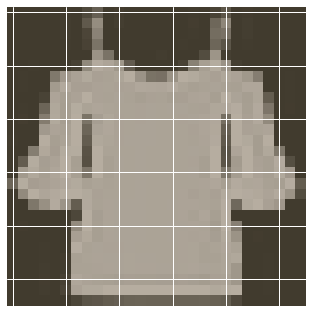

In [4]:
import helper
images, labels = next(iter(trainloader))
helper.imshow(images[0,:]);

In [0]:
from torch import nn
import torch.nn.functional as F
from torch import optim



In [8]:
model = nn.Sequential(nn.Linear(784,256),nn.ReLU(),nn.Linear(256,10),nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()

optimizer = optim.SGD(model.parameters(),lr=0.003)

epochs = 30
steps = 0
train_losses, test_losses = [], []


for e in range(epochs):
  running_loss = 0
  for images , labels in trainloader:
    optimizer.zero_grad()
  
    images = images.flatten(start_dim=1)
  
    output = model(images)
  
    loss = criterion(output,labels)
  
    loss.backward()
  
    optimizer.step()
    
    running_loss += loss.item()
  else:
    test_loss = 0
    accuracy = 0
    with torch.no_grad():
      for images , labels in testloader:
        images = images.flatten(start_dim=1)
        log_ps = model(images)
        test_loss += criterion(log_ps,labels)
        
        
        ps = torch.exp(log_ps)
        top_p , top_class = ps.topk(1,dim=1)
        equals = top_class == labels.view(*top_class.shape)
        accuracy += torch.mean(equals.type(torch.FloatTensor))
    train_losses.append(running_loss/len(trainloader))
    test_losses.append(test_loss/len(testloader))    
    print("Epoch: {}/{}.. ".format(e+1, epochs),"Training Loss: {:.3f}.. ".format(running_loss/len(trainloader)),"Test Loss: {:.3f}.. ".format(test_loss/len(testloader)),"Test Accuracy: {:.3f}".format(accuracy/len(testloader)))


Epoch: 1/30..  Training Loss: 1.150..  Test Loss: 0.777..  Test Accuracy: 0.741
Epoch: 2/30..  Training Loss: 0.683..  Test Loss: 0.645..  Test Accuracy: 0.774
Epoch: 3/30..  Training Loss: 0.597..  Test Loss: 0.594..  Test Accuracy: 0.791
Epoch: 4/30..  Training Loss: 0.552..  Test Loss: 0.557..  Test Accuracy: 0.804
Epoch: 5/30..  Training Loss: 0.523..  Test Loss: 0.537..  Test Accuracy: 0.811
Epoch: 6/30..  Training Loss: 0.502..  Test Loss: 0.523..  Test Accuracy: 0.812
Epoch: 7/30..  Training Loss: 0.486..  Test Loss: 0.508..  Test Accuracy: 0.818
Epoch: 8/30..  Training Loss: 0.473..  Test Loss: 0.499..  Test Accuracy: 0.823
Epoch: 9/30..  Training Loss: 0.462..  Test Loss: 0.492..  Test Accuracy: 0.826
Epoch: 10/30..  Training Loss: 0.453..  Test Loss: 0.479..  Test Accuracy: 0.830
Epoch: 11/30..  Training Loss: 0.445..  Test Loss: 0.474..  Test Accuracy: 0.830
Epoch: 12/30..  Training Loss: 0.438..  Test Loss: 0.468..  Test Accuracy: 0.833
Epoch: 13/30..  Training Loss: 0.431.